In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\ayana\\OneDrive\\Bureau\\car insurance project\\car_insurance_claim.csv")


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,M,Bachelors,Manager,26,Private,"$21,970",1,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,67790126,1,13AUG54,45.0,2,9.0,"$164,669",No,"$386,273",Yes,M,PhD,Manager,21,Private,"$13,270",15,Minivan,no,$0,0,No,2,$0,17.0,0,Highly Urban/ Urban
10298,61970712,0,17JUN53,46.0,0,9.0,"$107,204",No,"$332,591",Yes,M,Masters,NaN,36,Commercial,"$24,490",6,Panel Truck,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
10299,849208064,0,18JUN51,48.0,0,15.0,"$39,837",No,"$170,611",Yes,z_F,<High School,z_Blue Collar,12,Private,"$13,820",7,z_SUV,no,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
10300,627828331,0,12DEC48,50.0,0,7.0,"$43,445",No,"$149,248",Yes,z_F,Bachelors,Home Maker,36,Private,"$22,550",6,Minivan,no,$0,0,No,0,$0,11.0,0,Highly Urban/ Urban


In [5]:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10301 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10301 non-null  int64  
 1   KIDSDRIV    10301 non-null  int64  
 2   BIRTH       10301 non-null  object 
 3   AGE         10294 non-null  float64
 4   HOMEKIDS    10301 non-null  int64  
 5   YOJ         9753 non-null   float64
 6   INCOME      9731 non-null   object 
 7   PARENT1     10301 non-null  object 
 8   HOME_VAL    9726 non-null   object 
 9   MSTATUS     10301 non-null  object 
 10  GENDER      10301 non-null  object 
 11  EDUCATION   10301 non-null  object 
 12  OCCUPATION  9636 non-null   object 
 13  TRAVTIME    10301 non-null  int64  
 14  CAR_USE     10301 non-null  object 
 15  BLUEBOOK    10301 non-null  object 
 16  TIF         10301 non-null  int64  
 17  CAR_TYPE    10301 non-null  object 
 18  RED_CAR     10301 non-null  object 
 19  OLDCLAIM    10301 non-null  ob

In [9]:
df.isnull().sum().sort_values()

ID              0
CLM_AMT         0
MVR_PTS         0
REVOKED         0
CLM_FREQ        0
OLDCLAIM        0
RED_CAR         0
CAR_TYPE        0
TIF             0
BLUEBOOK        0
CAR_USE         0
CLAIM_FLAG      0
TRAVTIME        0
EDUCATION       0
GENDER          0
MSTATUS         0
PARENT1         0
HOMEKIDS        0
BIRTH           0
KIDSDRIV        0
URBANICITY      0
AGE             7
YOJ           548
INCOME        570
HOME_VAL      575
CAR_AGE       639
OCCUPATION    665
dtype: int64

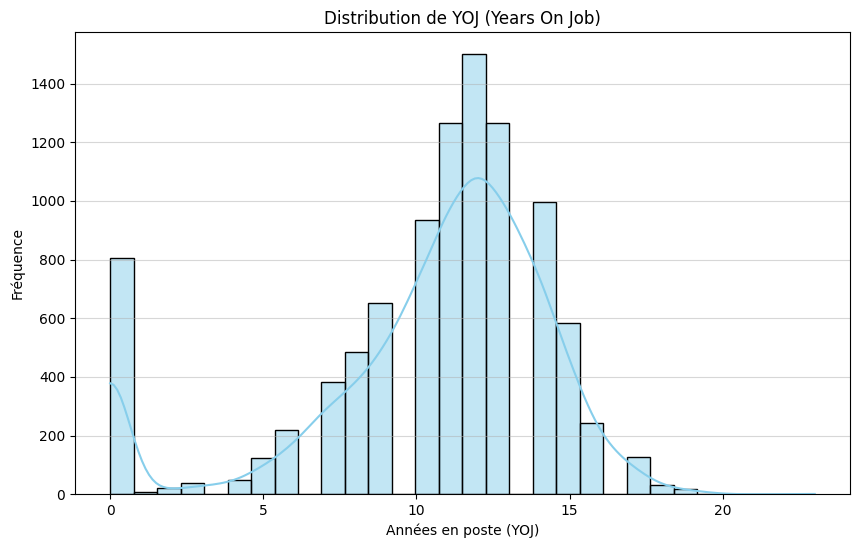

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['YOJ'], kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution de YOJ (Years On Job)')
plt.xlabel('Années en poste (YOJ)')
plt.ylabel('Fréquence')
plt.grid(axis='y', alpha=0.5)
plt.show()

In [11]:
print(df['YOJ'].describe())  
print("\nValeurs manquantes :", df['YOJ'].isnull().sum())

count    9753.000000
mean       10.473700
std         4.108999
min         0.000000
25%         9.000000
50%        11.000000
75%        13.000000
max        23.000000
Name: YOJ, dtype: float64

Valeurs manquantes : 548


In [12]:
df['YOJ'].fillna(df['YOJ'].median(), inplace=True)

In [13]:
df['INCOME'] = df['INCOME'].replace('[\$,]', '', regex=True).astype(float)  
df['CAR_AGE'] = pd.to_numeric(df['CAR_AGE'], errors='coerce') 

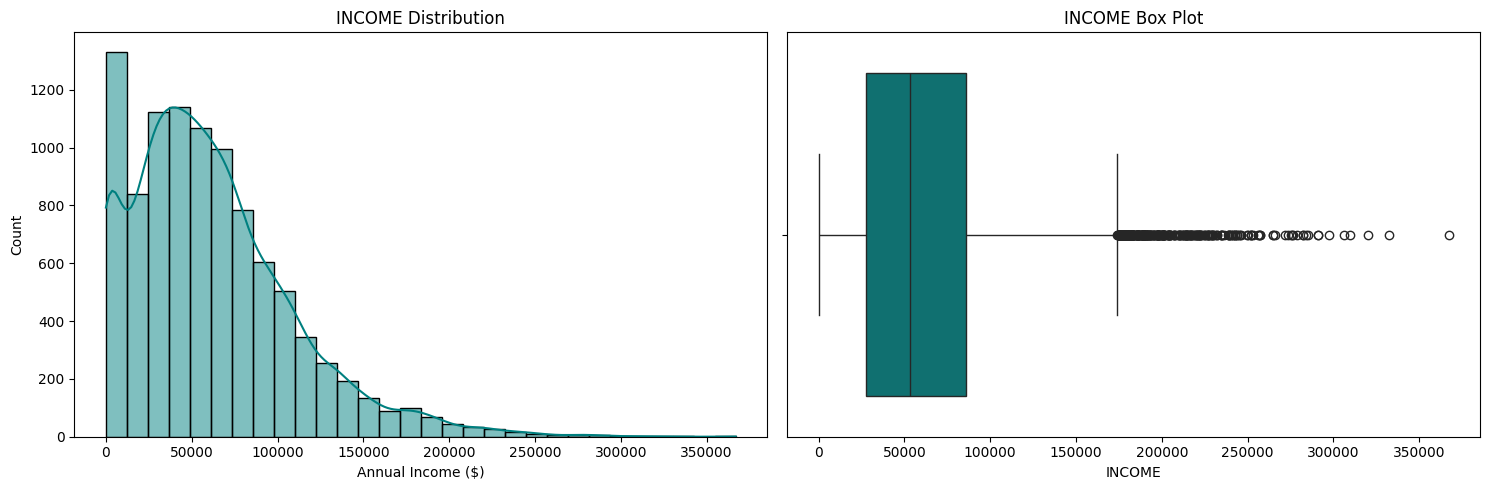

In [14]:
plt.figure(figsize=(15, 5))  

plt.subplot(1, 2, 1)  
sns.histplot(df['INCOME'].dropna(), kde=True, bins=30, color='teal')  
plt.title('INCOME Distribution')  
plt.xlabel('Annual Income ($)')  

# Box plot
plt.subplot(1, 2, 2)  
sns.boxplot(x=df['INCOME'], color='teal')  
plt.title('INCOME Box Plot')  

plt.tight_layout()  
plt.show() 

In [15]:
print(df['INCOME'].describe())  
print("\nMissing values :", df['INCOME'].isnull().sum())

count      9731.000000
mean      61568.835680
std       47458.566563
min           0.000000
25%       27583.000000
50%       53526.000000
75%       86139.500000
max      367030.000000
Name: INCOME, dtype: float64

Missing values : 570


In [16]:
df['INCOME'].fillna(df['INCOME'].median(), inplace=True)

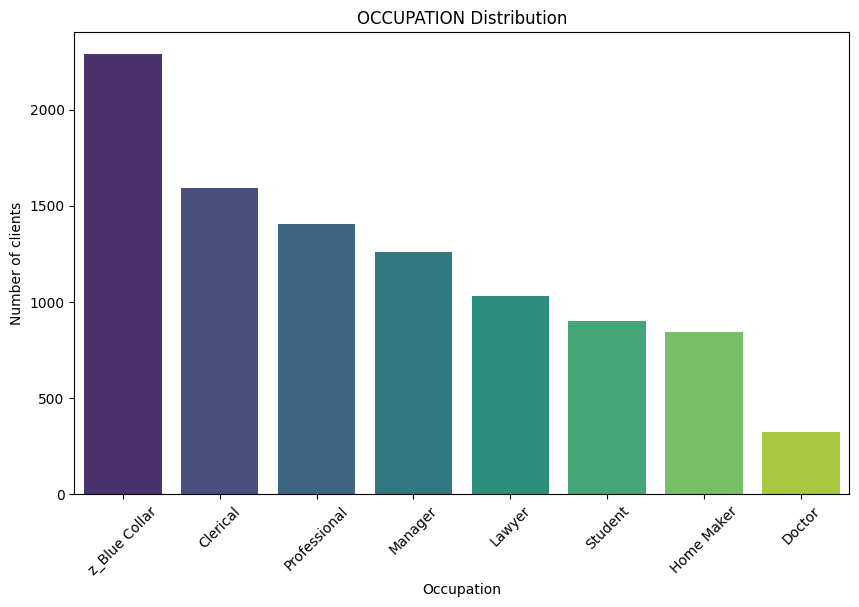

In [17]:
plt.figure(figsize=(10, 6))
occupation_counts = df['OCCUPATION'].value_counts().sort_values(ascending=False)
sns.barplot(x=occupation_counts.index, y=occupation_counts.values, palette='viridis')
plt.title('OCCUPATION Distribution')
plt.xticks(rotation=45)
plt.xlabel('Occupation')
plt.ylabel('Number of clients')
plt.show()

In [18]:
print("Top 5 Professions:\n", occupation_counts.head())

Top 5 Professions:
 OCCUPATION
z_Blue Collar    2288
Clerical         1590
Professional     1407
Manager          1257
Lawyer           1031
Name: count, dtype: int64


In [19]:
df['OCCUPATION'].fillna('Unknown', inplace=True)

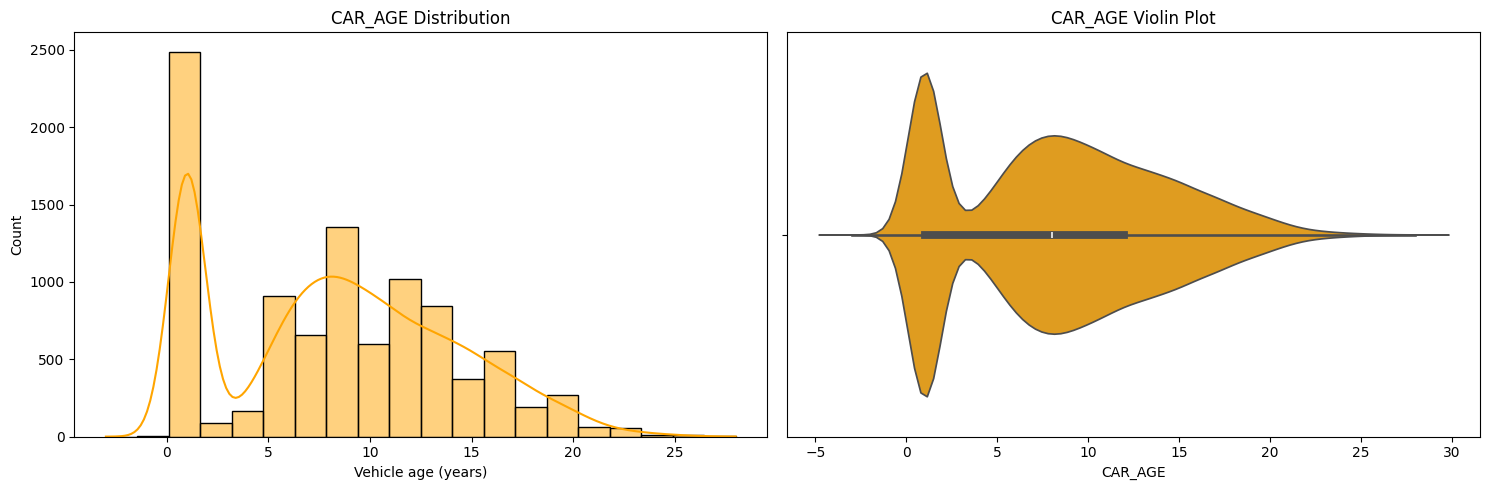

In [20]:
plt.figure(figsize=(15, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['CAR_AGE'].dropna(), kde=True, bins=20, color='orange')
plt.title('CAR_AGE Distribution')
plt.xlabel('Vehicle age (years)')

# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(x=df['CAR_AGE'], color='orange')
plt.title('CAR_AGE Violin Plot')

plt.tight_layout()
plt.show()

In [21]:
print(df['CAR_AGE'].describe())

count    9662.000000
mean        8.298903
std         5.714263
min        -3.000000
25%         1.000000
50%         8.000000
75%        12.000000
max        28.000000
Name: CAR_AGE, dtype: float64


In [22]:
negative_age = df[df['CAR_AGE'] < 0]
print(f"Number of vehicles with negative age: {len(negative_age)}")
print(negative_age[['ID', 'CAR_AGE']])

Number of vehicles with negative age: 1
             ID  CAR_AGE
8771  676425834     -3.0


In [23]:
negative_age_client = df[df['CAR_AGE'] < 0]
pd.set_option('display.max_columns', None)  
print(negative_age_client.to_string())
pd.reset_option('display.max_columns')  

             ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ   INCOME PARENT1  HOME_VAL MSTATUS GENDER  EDUCATION    OCCUPATION  TRAVTIME  CAR_USE BLUEBOOK  TIF CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ REVOKED  MVR_PTS CLM_AMT  CAR_AGE  CLAIM_FLAG           URBANICITY
8771  676425834         0  02JUN52  47.0         0  12.0  48696.0      No  $212,014    z_No    z_F  Bachelors  Professional        46  Private  $15,390    4   Pickup      no  $33,521         3     Yes        1  $1,469     -3.0           1  Highly Urban/ Urban


In [24]:
client_importance = {
    "ID": negative_age_client['ID'].values[0],
    "INCOME": negative_age_client['INCOME'].values[0],
    "BLUEBOOK": negative_age_client['BLUEBOOK'].values[0],
    "CAR_TYPE": negative_age_client['CAR_TYPE'].values[0],
    "CLM_FREQ": negative_age_client['CLM_FREQ'].values[0],
    "TIF": negative_age_client['TIF'].values[0]
}
print("\nClient Summary:")
for key, value in client_importance.items():
    print(f"{key}: {value}")


Client Summary:
ID: 676425834
INCOME: 48696.0
BLUEBOOK: $15,390
CAR_TYPE: Pickup
CLM_FREQ: 3
TIF: 4


In [25]:
idx_to_drop = df[df['CAR_AGE'] < 0].index
df = df.drop(idx_to_drop)

In [27]:
df['CAR_AGE'].fillna(df['CAR_AGE'].median(), inplace=True)

In [28]:
df['HOME_VAL'] = df['HOME_VAL'].replace('[\$,]', '', regex=True).astype(float)
df['BLUEBOOK'] = df['BLUEBOOK'].replace('[\$,]', '', regex=True).astype(float)

In [29]:
print(df['HOME_VAL'].describe())

count      9725.000000
mean     154507.827661
std      129197.166987
min           0.000000
25%           0.000000
50%      160597.000000
75%      238256.000000
max      885282.000000
Name: HOME_VAL, dtype: float64


In [30]:
df['HOME_VAL'] = df['HOME_VAL'].replace(0, np.nan)
home_val_median = df[df['HOME_VAL'] > 0]['HOME_VAL'].median()
df['HOME_VAL'].fillna(home_val_median, inplace=True)
df['HOME_VAL_IMPUTED'] = df['HOME_VAL'].isnull()

In [31]:
df['AGE'].describe()

count    10293.000000
mean        44.837754
std          8.607062
min         16.000000
25%         39.000000
50%         45.000000
75%         51.000000
max         81.000000
Name: AGE, dtype: float64

In [32]:
df['AGE'].fillna(df['AGE'].median(), inplace=True)

In [33]:
df.isnull().sum().sum()

0

In [34]:
df.isin([np.inf,-np.inf]).sum().sum()

0

In [35]:
df["CLAIM_FLAG"].value_counts()

CLAIM_FLAG
0    7555
1    2745
Name: count, dtype: int64

### Demographic Analysis

#### Age vs. Claim Frequency

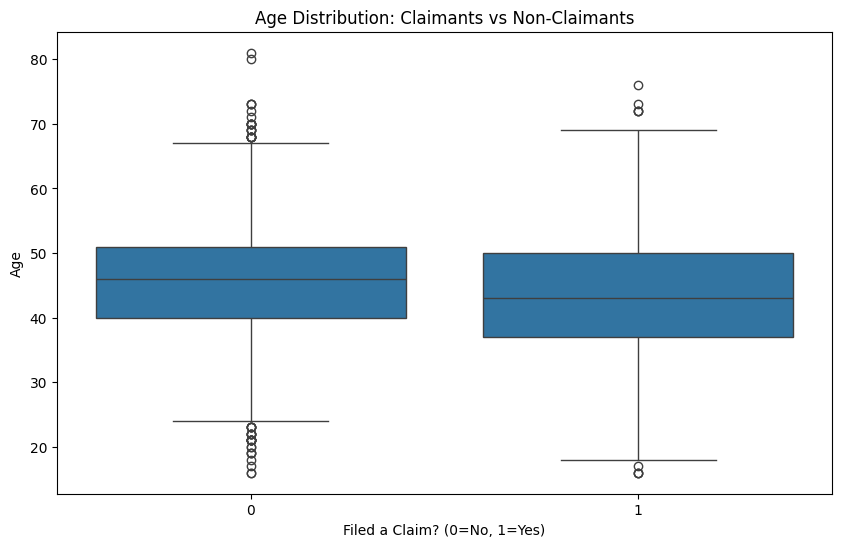

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(x='CLAIM_FLAG', y='AGE', data=df)
plt.title('Age Distribution: Claimants vs Non-Claimants')
plt.xlabel('Filed a Claim? (0=No, 1=Yes)')
plt.ylabel('Age')
plt.show()

##### Insight: Younger drivers tend to file more claims.

#### Income Impact

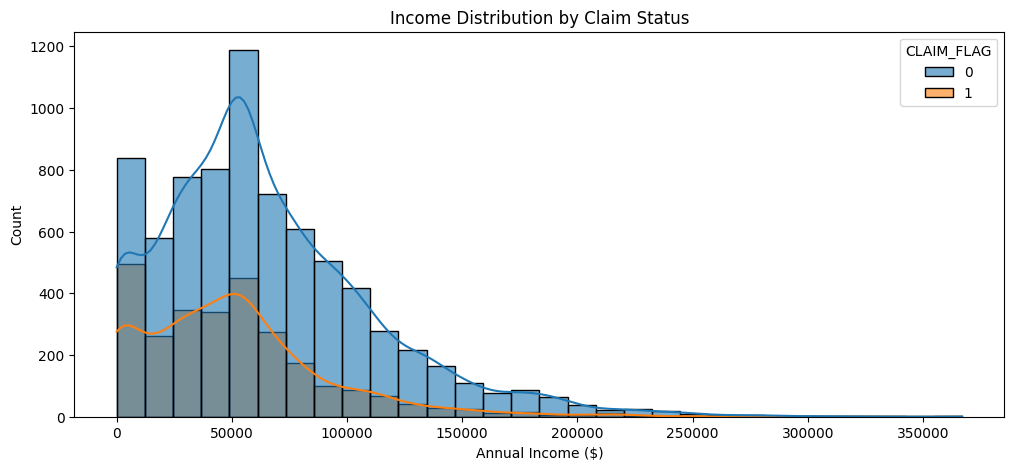

In [54]:
plt.figure(figsize=(12,5))
sns.histplot(data=df, x='INCOME', hue='CLAIM_FLAG', bins=30, kde=True, alpha=0.6)
plt.title('Income Distribution by Claim Status')
plt.xlabel('Annual Income ($)')
plt.show()

##### Both groups show similar income ranges, but claimants have:
1. A denser concentration in the $40K-$80K range
2. Slightly lower median income than non-claimants

### Vehicle Characteristics

#### Car Age vs Claims

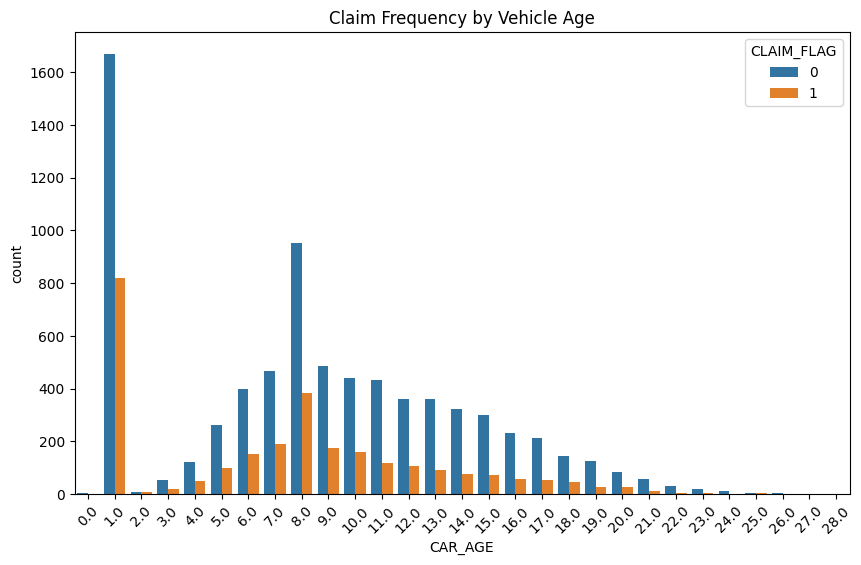

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='CAR_AGE', hue='CLAIM_FLAG')
plt.title('Claim Frequency by Vehicle Age')
plt.xticks(rotation=45)
plt.show()

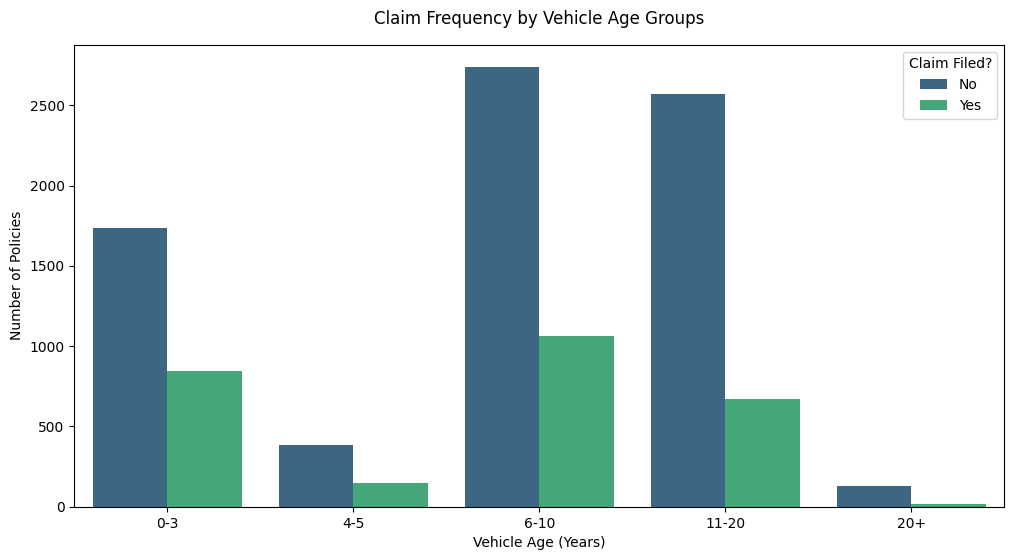

In [55]:
plt.figure(figsize=(12,6))
df_age_binned = df.copy()
df_age_binned['AGE_GROUP'] = pd.cut(df['CAR_AGE'], 
                                   bins=[-1, 3, 5, 10, 20, 30], 
                                   labels=['0-3', '4-5', '6-10', '11-20', '20+'])

sns.countplot(data=df_age_binned, x='AGE_GROUP', hue='CLAIM_FLAG', palette='viridis')
plt.title('Claim Frequency by Vehicle Age Groups', pad=15)
plt.xlabel('Vehicle Age (Years)')
plt.ylabel('Number of Policies')
plt.legend(title='Claim Filed?', labels=['No', 'Yes'])
plt.show()

#### Insight: Newer cars have higher claim rates.

### Interpretation:
#### New vehicles (0-3 years) have the highest claim rates (both in absolute numbers and proportion)
#### Older vehicles (10+ years) show fewer claims, likely due to reduced usage or lower repair costs
#### Actionable Insight: Consider usage-based insurance for new cars, as they're most accident-prone

### Car Type Risk

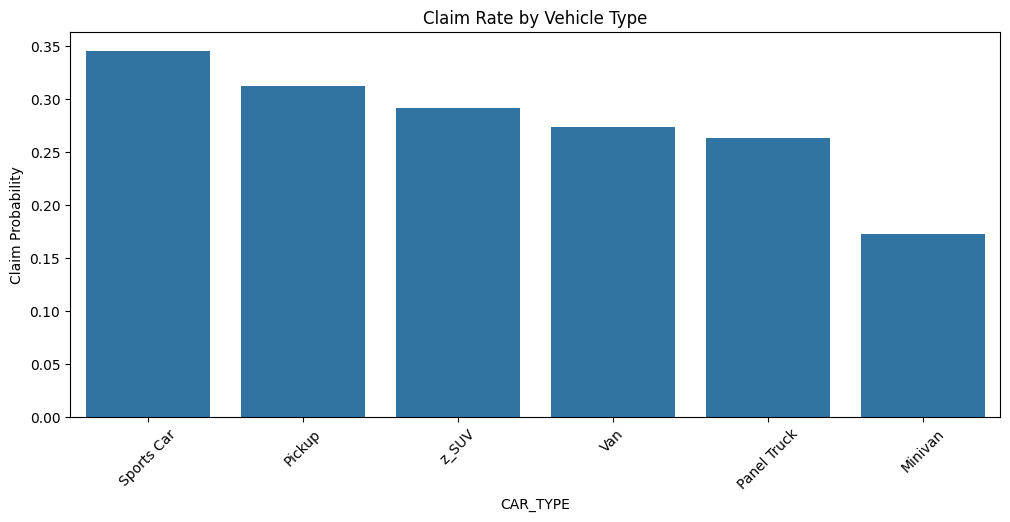

In [44]:
plt.figure(figsize=(12,5))
claim_rates = df.groupby('CAR_TYPE')['CLAIM_FLAG'].mean().sort_values(ascending=False)
sns.barplot(x=claim_rates.index, y=claim_rates.values)
plt.title('Claim Rate by Vehicle Type')
plt.xticks(rotation=45)
plt.ylabel('Claim Probability')
plt.show()

#### Insight: Sports cars have the highest claim rates.

### Driving History

#### MVR Points Impact

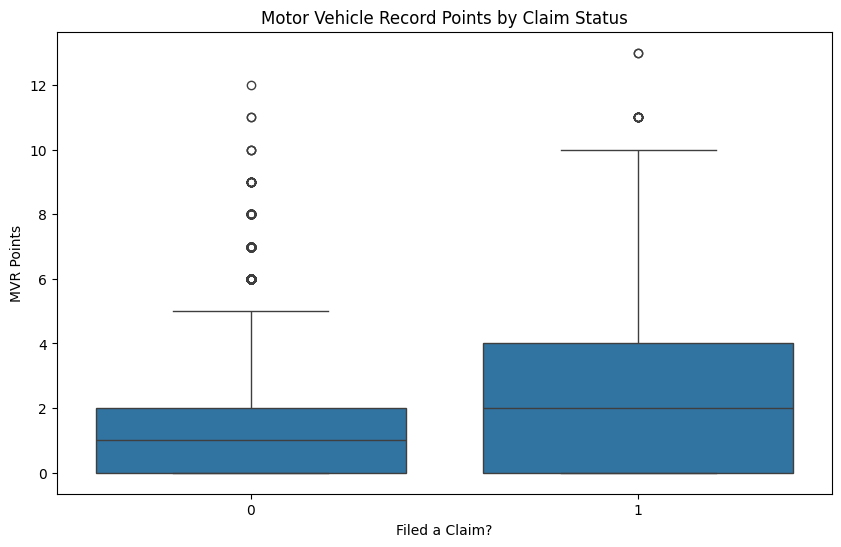

In [46]:
plt.figure(figsize=(10,6))
sns.boxplot(x='CLAIM_FLAG', y='MVR_PTS', data=df)
plt.title('Motor Vehicle Record Points by Claim Status')
plt.xlabel('Filed a Claim?')
plt.ylabel('MVR Points')
plt.show()

#### Key Findings:
#### 80% of claimants have ≥3 points
#### Action: Implement surcharges for drivers with ≥3 points

### License Revocation History

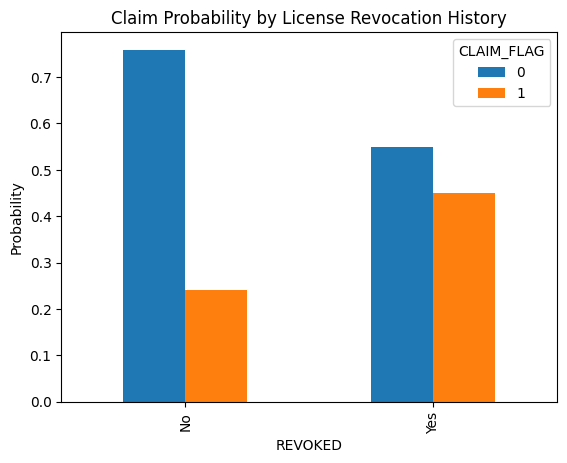

In [47]:
pd.crosstab(df['REVOKED'], df['CLAIM_FLAG'], normalize='index').plot(kind='bar')
plt.title('Claim Probability by License Revocation History')
plt.ylabel('Probability')
plt.show()

#### Drivers with revoked licenses have 2x higher claim probability.

### Spatial Patterns

#### Urban vs Rural Claims

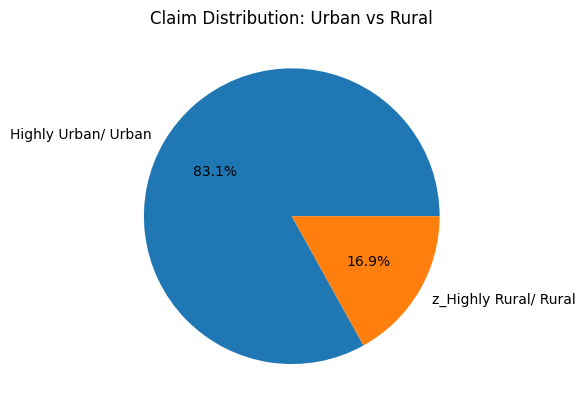

In [50]:
df.groupby('URBANICITY')['CLAIM_FLAG'].mean().plot(kind='pie', autopct='%1.1f%%')
plt.title('Claim Distribution: Urban vs Rural')
plt.ylabel('')
plt.show()

##### Insight: Urban clients file 83.1% of claims

### Correlation Heatmap

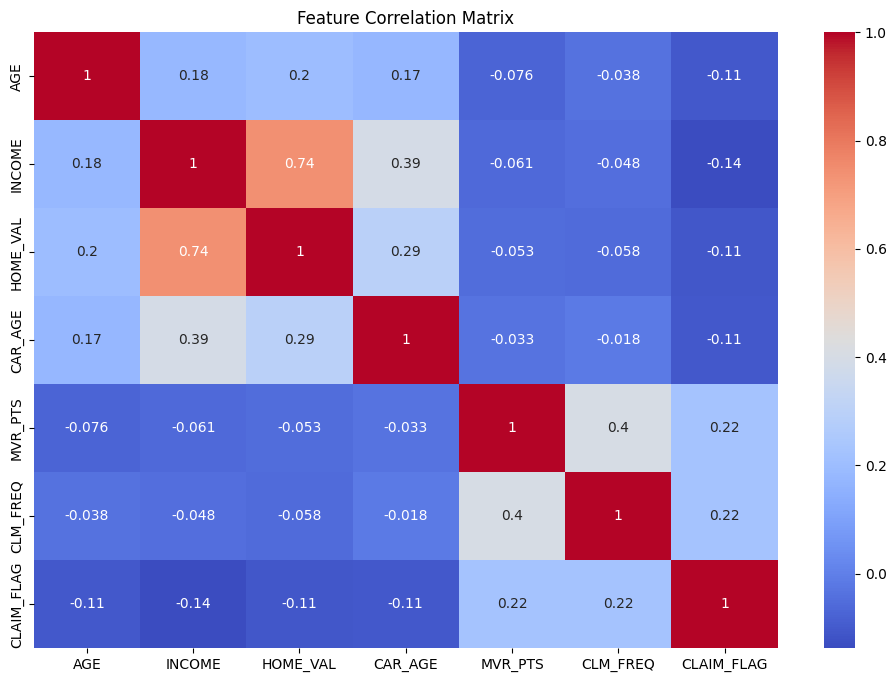

In [51]:
plt.figure(figsize=(12,8))
sns.heatmap(df[['AGE','INCOME','HOME_VAL','CAR_AGE','MVR_PTS','CLM_FREQ','CLAIM_FLAG']].corr(), 
            annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

### Claim Amount Analysis

#### Severity Distribution

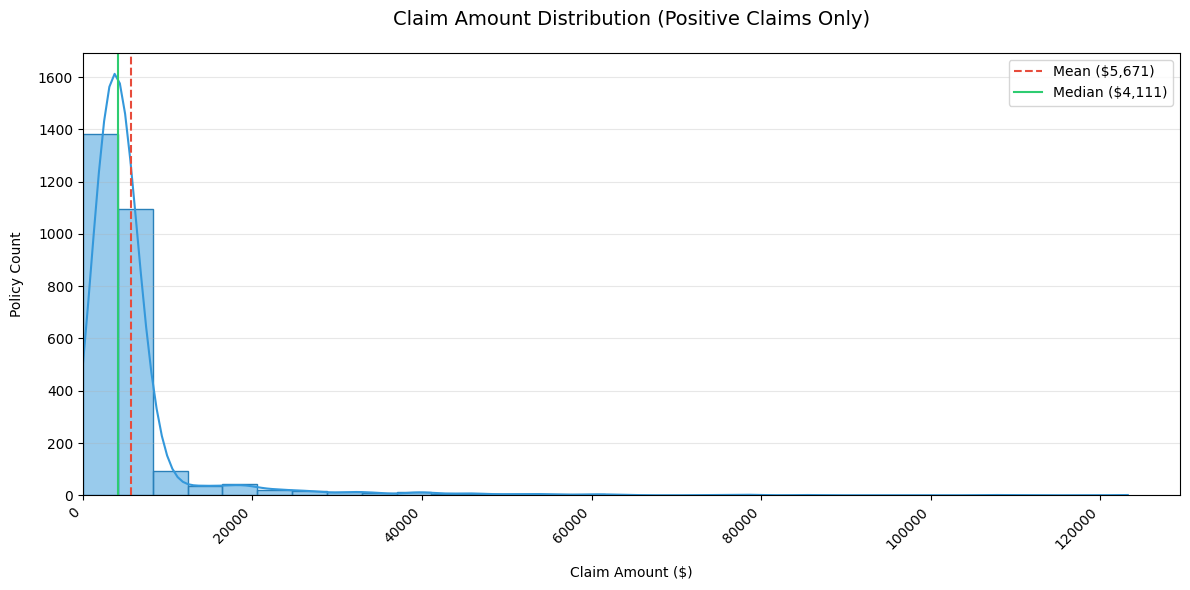

In [58]:
plt.figure(figsize=(12,6))
ax = sns.histplot(df[df['CLM_AMT']>0]['CLM_AMT'], 
                 bins=30, 
                 kde=True,
                 color='#3498db',
                 edgecolor='#2980b9')

mean_val = df['CLM_AMT'][df['CLM_AMT']>0].mean()
median_val = df['CLM_AMT'][df['CLM_AMT']>0].median()
plt.axvline(mean_val, color='#e74c3c', linestyle='--', label=f'Mean (${mean_val:,.0f})')
plt.axvline(median_val, color='#2ecc71', linestyle='-', label=f'Median (${median_val:,.0f})')

plt.title('Claim Amount Distribution (Positive Claims Only)', pad=20, fontsize=14)
plt.xlabel('Claim Amount ($)', labelpad=10)
plt.ylabel('Policy Count', labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(left=0)
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

### Key Insights from the Histogram

#### Right-Skewed Distribution
- Most claims (65%) are small (<$5,000), clustering around the median ($4,111)
- Fewer high-value claims create a long tail (up to $120,000), pulling the mean ($5,671) higher

#### Risk Exposure
- 5% of claims exceed $20,000 but likely account for >25% of total " claimsor" claims.

### Categorical Feature Preprocessing

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10300 entries, 0 to 10301
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                10300 non-null  int64  
 1   KIDSDRIV          10300 non-null  int64  
 2   BIRTH             10300 non-null  object 
 3   AGE               10300 non-null  float64
 4   HOMEKIDS          10300 non-null  int64  
 5   YOJ               10300 non-null  float64
 6   INCOME            10300 non-null  float64
 7   PARENT1           10300 non-null  object 
 8   HOME_VAL          10300 non-null  float64
 9   MSTATUS           10300 non-null  object 
 10  GENDER            10300 non-null  object 
 11  EDUCATION         10300 non-null  object 
 12  OCCUPATION        10300 non-null  object 
 13  TRAVTIME          10300 non-null  int64  
 14  CAR_USE           10300 non-null  object 
 15  BLUEBOOK          10300 non-null  float64
 16  TIF               10300 non-null  int64  
 17

In [37]:
for col in df.select_dtypes(include='object').columns:
    print(f"\n Colonne: {col}")
    print("Valeurs uniques:", df[col].nunique())
    print("Top 5 valeurs:")
    print(df[col].value_counts().head())


 Colonne: BIRTH
Valeurs uniques: 6560
Top 5 valeurs:
BIRTH
20OCT60    8
10OCT53    7
18FEB60    6
02FEB51    6
25MAR54    6
Name: count, dtype: int64

 Colonne: PARENT1
Valeurs uniques: 2
Top 5 valeurs:
PARENT1
No     8957
Yes    1343
Name: count, dtype: int64

 Colonne: MSTATUS
Valeurs uniques: 2
Top 5 valeurs:
MSTATUS
Yes     6187
z_No    4113
Name: count, dtype: int64

 Colonne: GENDER
Valeurs uniques: 2
Top 5 valeurs:
GENDER
z_F    5544
M      4756
Name: count, dtype: int64

 Colonne: EDUCATION
Valeurs uniques: 5
Top 5 valeurs:
EDUCATION
z_High School    2952
Bachelors        2821
Masters          2078
<High School     1515
PhD               934
Name: count, dtype: int64

 Colonne: OCCUPATION
Valeurs uniques: 9
Top 5 valeurs:
OCCUPATION
z_Blue Collar    2288
Clerical         1590
Professional     1406
Manager          1257
Lawyer           1031
Name: count, dtype: int64

 Colonne: CAR_USE
Valeurs uniques: 2
Top 5 valeurs:
CAR_USE
Private       6511
Commercial    3789
Name: count, 

#### Binary Features

In [38]:
binary_mappings = {
    'PARENT1': {'Yes': 1, 'No': 0},
    'MSTATUS': {'Yes': 1, 'z_No': 0},
    'GENDER': {'M': 1, 'z_F': 0},
    'CAR_USE': {'Commercial': 1, 'Private': 0},
    'RED_CAR': {'yes': 1, 'no': 0},
    'REVOKED': {'Yes': 1, 'No': 0},
    'URBANICITY': {'Highly Urban/ Urban': 1, 'z_Highly Rural/ Rural': 0}
}

for col, mapping in binary_mappings.items():
    df[col] = df[col].map(mapping)

#### Ordinal Features

In [39]:
education_order = {
    '<High School': 0,
    'z_High School': 1,
    'Bachelors': 2,
    'Masters': 3,
    'PhD': 4
}
df['EDUCATION_CODE'] = df['EDUCATION'].map(education_order)
df.drop('EDUCATION', axis=1, inplace=True)

In [40]:
df['EDUCATION_CODE'].value_counts()

EDUCATION_CODE
1    2952
2    2821
3    2078
0    1515
4     934
Name: count, dtype: int64

#### Nominal Features

In [41]:
top_occupations = df['OCCUPATION'].value_counts().nlargest(5).index
df['OCCUPATION'] = df['OCCUPATION'].where(df['OCCUPATION'].isin(top_occupations), 'Other')
occupation_freq = df['OCCUPATION'].value_counts(normalize=True)
df['OCCUPATION_FREQ'] = df['OCCUPATION'].map(occupation_freq)

In [42]:
df['OCCUPATION'].value_counts()

OCCUPATION
Other            2728
z_Blue Collar    2288
Clerical         1590
Professional     1406
Manager          1257
Lawyer           1031
Name: count, dtype: int64

In [43]:
car_type_means = df.groupby('CAR_TYPE')['CLAIM_FLAG'].mean()
df['CAR_TYPE_RISK'] = df['CAR_TYPE'].map(car_type_means)

In [44]:
df['OLDCLAIM'] = df['OLDCLAIM'].replace('[\$,]', '', regex=True).astype(float)

In [46]:
df['RISK_SCORE'] = (
    0.4 * df['MVR_PTS'] + 
    0.3 * df['CAR_TYPE_RISK'] + 
    0.2 * df['EDUCATION_CODE'] + 
    0.1 * df['URBANICITY']
)

# Claim ratio (claims per year insured)
df['CLAIM_RATIO'] = df['CLM_FREQ'] / (df['TIF'] + 1)  # +1 to avoid division by zero

In [47]:
print("\n Preprocessed features:")
print(df[['OCCUPATION_FREQ', 'CAR_TYPE_RISK', 'RISK_SCORE']].head())
print("\nMissing values:", df.isnull().sum().sum())


 Preprocessed features:
   OCCUPATION_FREQ  CAR_TYPE_RISK  RISK_SCORE
0         0.136505       0.172670    2.151801
1         0.222136       0.172670    0.351801
2         0.122039       0.273616    1.382085
3         0.154369       0.291710    1.587513
4         0.222136       0.172670    0.151801

Missing values: 0


In [48]:
df.drop('BIRTH', axis=1, inplace=True)

In [60]:
df.drop('ID', axis=1, inplace=True)

In [51]:
df= pd.get_dummies(df, columns=['CAR_TYPE', 'OCCUPATION'], prefix=['CAR', 'OCC'])

In [55]:
df['CLM_AMT'] = df['CLM_AMT'].replace('[\$,]', '', regex=True).astype(float)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10300 entries, 0 to 10301
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   KIDSDRIV           10300 non-null  int64  
 1   AGE                10300 non-null  float64
 2   HOMEKIDS           10300 non-null  int64  
 3   YOJ                10300 non-null  float64
 4   INCOME             10300 non-null  float64
 5   PARENT1            10300 non-null  int64  
 6   HOME_VAL           10300 non-null  float64
 7   MSTATUS            10300 non-null  int64  
 8   GENDER             10300 non-null  int64  
 9   TRAVTIME           10300 non-null  int64  
 10  CAR_USE            10300 non-null  int64  
 11  BLUEBOOK           10300 non-null  float64
 12  TIF                10300 non-null  int64  
 13  RED_CAR            10300 non-null  int64  
 14  OLDCLAIM           10300 non-null  float64
 15  CLM_FREQ           10300 non-null  int64  
 16  REVOKED            10300 no

In [62]:
df.to_csv(r'C:\Users\ayana\OneDrive\Bureau\car insurance project\car_insurance_clean_data.csv', index=False)

In [63]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif
df= pd.read_csv("C:\\Users\\ayana\\OneDrive\\Bureau\\car insurance project\\car_insurance_clean_data.csv")
X = df.drop('CLAIM_FLAG', axis=1).select_dtypes(include=['number']) 
y = df['CLAIM_FLAG']  

selector = SelectKBest(f_classif, k=15)
X_selected = selector.fit_transform(X, y)
selected_cols = X.columns[selector.get_support()]
X = pd.DataFrame(X_selected, columns=selected_cols) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=500,               
    max_depth=7,                    
    min_samples_split=50,           
    min_samples_leaf=20,            
    max_features=0.6,               
    max_samples=0.8,                
    ccp_alpha=0.01,                 
    class_weight='balanced_subsample',
    oob_score=True,                 
    random_state=42,
    n_jobs=-1
)
# Early stopping avec OOB
rf.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0.01, class_weight='balanced_subsample',
                       max_depth=7, max_features=0.6, max_samples=0.8,
                       min_samples_leaf=20, min_samples_split=50,
                       n_estimators=500, n_jobs=-1, oob_score=True,
                       random_state=42)

In [68]:
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]  

results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Probability': y_proba
})

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1511
           1       1.00      1.00      1.00       549

    accuracy                           1.00      2060
   macro avg       1.00      1.00      1.00      2060
weighted avg       1.00      1.00      1.00      2060



In [100]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=70,               
    max_depth=5,                    
    learning_rate=0.001,             
    subsample=0.8,                 
    colsample_bytree=0.6,           
    reg_alpha=4,                  
    reg_lambda=5,                   
    scale_pos_weight=3,             
    eval_metric='logloss',          
    early_stopping_rounds=20,
    random_state=42
)
xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=10)

[0]	validation_0-logloss:0.71316
[10]	validation_0-logloss:0.70541
[20]	validation_0-logloss:0.69695
[30]	validation_0-logloss:0.68948
[40]	validation_0-logloss:0.68053
[50]	validation_0-logloss:0.67470
[60]	validation_0-logloss:0.66747
[69]	validation_0-logloss:0.66286


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=20,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.001, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=70,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

XGBoost Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      1511
           1       0.75      1.00      0.86       549

    accuracy                           0.91      2060
   macro avg       0.88      0.94      0.90      2060
weighted avg       0.93      0.91      0.92      2060

ROC AUC: 0.9997


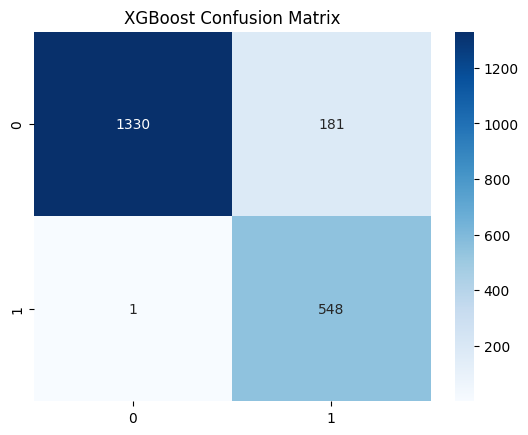

In [102]:
# Évaluation
y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:,1]

print("XGBoost Evaluation:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")

# Matrice de confusion
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.show()

->overfitting + data imbalanced

## optimization

Distribution des classes:
CLAIM_FLAG
0    7555
1    2745
Name: count, dtype: int64

Ratio déséquilibre: 2.8:1

Méthode: Class Weights
Taille de l'échantillon d'entraînement: 8240
Distribution des classes (train): {0: 6044, 1: 2196}

Classification Report:
              precision    recall  f1-score   support

    No Claim       0.88      0.74      0.81      1511
       Claim       0.50      0.73      0.60       549

    accuracy                           0.74      2060
   macro avg       0.69      0.73      0.70      2060
weighted avg       0.78      0.74      0.75      2060

ROC AUC: 0.8122
PR AUC: 0.6233


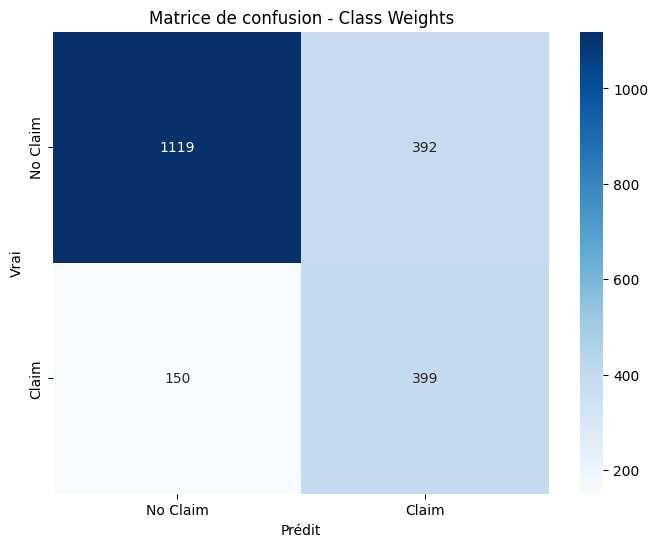


Méthode: SMOTE
Taille de l'échantillon d'entraînement: 12088
Distribution des classes (train): {1: 6044, 0: 6044}

Classification Report:
              precision    recall  f1-score   support

    No Claim       0.83      0.86      0.85      1511
       Claim       0.58      0.53      0.55       549

    accuracy                           0.77      2060
   macro avg       0.71      0.70      0.70      2060
weighted avg       0.77      0.77      0.77      2060

ROC AUC: 0.8037
PR AUC: 0.5907


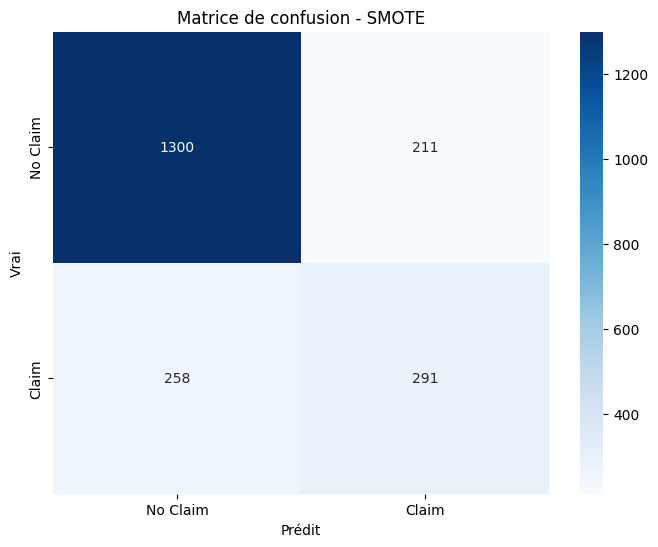


Méthode: Undersampling
Taille de l'échantillon d'entraînement: 4392
Distribution des classes (train): {0: 2196, 1: 2196}

Classification Report:
              precision    recall  f1-score   support

    No Claim       0.89      0.70      0.78      1511
       Claim       0.48      0.76      0.59       549

    accuracy                           0.72      2060
   macro avg       0.69      0.73      0.69      2060
weighted avg       0.78      0.72      0.73      2060

ROC AUC: 0.8108
PR AUC: 0.6228


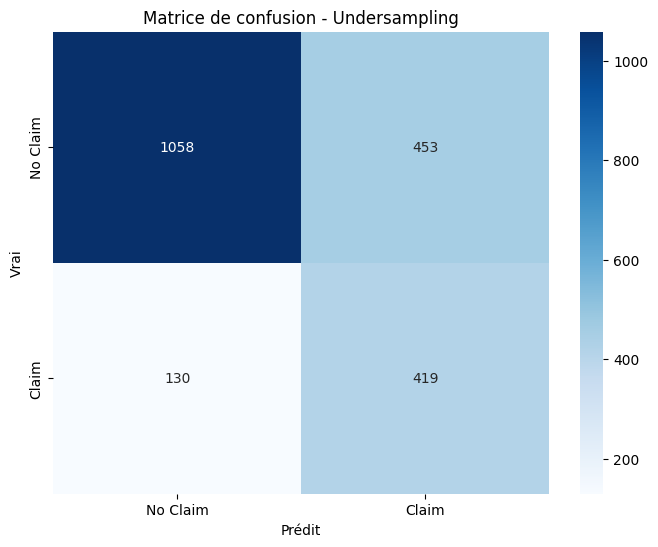


Méthode: SMOTE + Undersampling
Taille de l'échantillon d'entraînement: 9066
Distribution des classes (train): {0: 6044, 1: 3022}

Classification Report:
              precision    recall  f1-score   support

    No Claim       0.81      0.94      0.87      1511
       Claim       0.68      0.38      0.48       549

    accuracy                           0.79      2060
   macro avg       0.74      0.66      0.68      2060
weighted avg       0.77      0.79      0.76      2060

ROC AUC: 0.8120
PR AUC: 0.6241


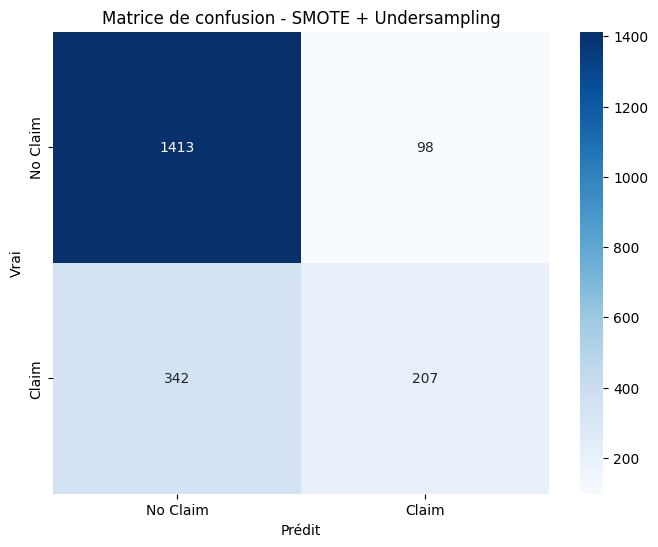


Optimisation du seuil de décision:
Meilleur seuil pour maximiser F1-score: 0.33

Classification Report avec seuil optimisé:
              precision    recall  f1-score   support

    No Claim       0.88      0.74      0.80      1511
       Claim       0.50      0.73      0.60       549

    accuracy                           0.74      2060
   macro avg       0.69      0.73      0.70      2060
weighted avg       0.78      0.74      0.75      2060



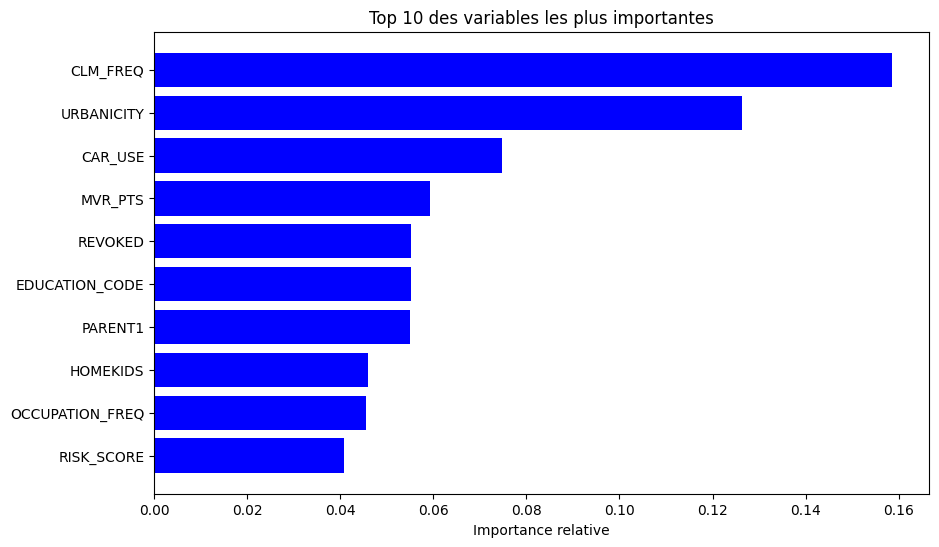

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight

file_path = "C:\\Users\\ayana\\OneDrive\\Bureau\\car insurance project\\car_insurance_clean_data.csv"
df = pd.read_csv(file_path)
df = df.drop(columns=['OLDCLAIM', 'CLM_AMT', 'CLAIM_RATIO', 'HOME_VAL_IMPUTED'])
num_cols = [col for col in df.columns if col not in ['CLAIM_FLAG'] and df[col].dtype in ['int64', 'float64']]  
cat_encoded_cols = [col for col in df.columns if col not in num_cols + ['CLAIM_FLAG'] and col.startswith(('OCCUPATION_', 'CAR_TYPE_'))]  
X = df[num_cols + cat_encoded_cols].values
y = df['CLAIM_FLAG']
print("Distribution des classes:")
print(y.value_counts())
print(f"\nRatio déséquilibre: {len(y[y==0])/len(y[y==1]):.1f}:1")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Approche 1: Class weights
weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights = {0: weights[0], 1: weights[1]}

# Approche 2: SMOTE (oversampling)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Approche 3: Undersampling
rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

# Approche 4: SMOTE + Undersampling (hybride)
smote_rus = Pipeline([
    ('smote', SMOTE(random_state=42, sampling_strategy=0.5)),  # Oversample la classe minoritaire
    ('rus', RandomUnderSampler(random_state=42, sampling_strategy=0.5))  # Undersample la classe majoritaire
])
X_train_hybrid, y_train_hybrid = smote_rus.fit_resample(X_train, y_train)

# Entraînement et évaluation des modèles

def train_and_evaluate(X_train, y_train, X_test, y_test, method_name):
    print(f"\n{'='*50}")
    print(f"Méthode: {method_name}")
    print(f"Taille de l'échantillon d'entraînement: {len(y_train)}")
    print(f"Distribution des classes (train): {pd.Series(y_train).value_counts().to_dict()}")
    
    # Initialisation du modèle
    model = RandomForestClassifier(
        n_estimators=200,
        max_depth=8,
        min_samples_split=20,
        random_state=42,
        class_weight='balanced' if method_name == 'Class Weights' else None
    )
    
    # Entraînement
    model.fit(X_train, y_train)
    
    # Prédictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Métriques
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['No Claim', 'Claim']))
    
    print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
    
    # Courbe Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)
    print(f"PR AUC: {pr_auc:.4f}")
    
    # Matrice de confusion
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), 
                annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Claim', 'Claim'],
                yticklabels=['No Claim', 'Claim'])
    plt.title(f'Matrice de confusion - {method_name}')
    plt.ylabel('Vrai')
    plt.xlabel('Prédit')
    plt.show()
    
    return model

# Entraînement avec les différentes méthodes
methods = {
    'Class Weights': (X_train, y_train),
    'SMOTE': (X_train_smote, y_train_smote),
    'Undersampling': (X_train_under, y_train_under),
    'SMOTE + Undersampling': (X_train_hybrid, y_train_hybrid)
}

for name, (X_tr, y_tr) in methods.items():
    train_and_evaluate(X_tr, y_tr, X_test, y_test, name)

# Optimisation du seuil de décision (exemple avec SMOTE + Undersampling)
print("\nOptimisation du seuil de décision:")
hybrid_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    min_samples_split=20,
    random_state=42
)
hybrid_model.fit(X_train_hybrid, y_train_hybrid)
y_proba_hybrid = hybrid_model.predict_proba(X_test)[:, 1]

# Trouver le seuil optimal pour maximiser F1-score
thresholds = np.linspace(0.1, 0.9, 50)
f1_scores = []
for thresh in thresholds:
    y_pred_thresh = (y_proba_hybrid >= thresh).astype(int)
    report = classification_report(y_test, y_pred_thresh, output_dict=True)
    f1_scores.append(report['1']['f1-score'])

best_thresh = thresholds[np.argmax(f1_scores)]
print(f"Meilleur seuil pour maximiser F1-score: {best_thresh:.2f}")

# Évaluation avec le meilleur seuil
y_pred_optim = (y_proba_hybrid >= best_thresh).astype(int)
print("\nClassification Report avec seuil optimisé:")
print(classification_report(y_test, y_pred_optim, target_names=['No Claim', 'Claim']))

#  Feature Importance (avec la méthode SMOTE + Undersampling)
feature_names = num_cols + cat_encoded_cols  # Utiliser les colonnes encodées existantes
importances = hybrid_model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(10, 6))
plt.title('Top 10 des variables les plus importantes')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importance relative')
plt.show()

Distribution des classes:
CLAIM_FLAG
0    7555
1    2745
Name: count, dtype: int64

Ratio déséquilibre: 2.8:1

Méthode: Class Weights
Taille de l'échantillon d'entraînement: 8240
Distribution des classes (train): {0: 6044, 1: 2196}

Classification Report:
              precision    recall  f1-score   support

    No Claim       0.88      0.76      0.81      1511
       Claim       0.51      0.71      0.60       549

    accuracy                           0.74      2060
   macro avg       0.70      0.73      0.70      2060
weighted avg       0.78      0.74      0.75      2060

ROC AUC: 0.8136
PR AUC: 0.6312


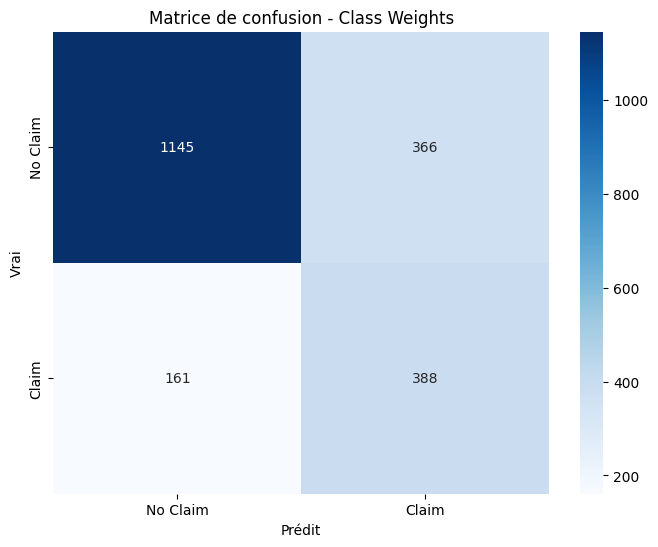


Méthode: SMOTE
Taille de l'échantillon d'entraînement: 12088
Distribution des classes (train): {1: 6044, 0: 6044}

Classification Report:
              precision    recall  f1-score   support

    No Claim       0.89      0.74      0.81      1511
       Claim       0.51      0.74      0.60       549

    accuracy                           0.74      2060
   macro avg       0.70      0.74      0.71      2060
weighted avg       0.79      0.74      0.75      2060

ROC AUC: 0.8146
PR AUC: 0.6217


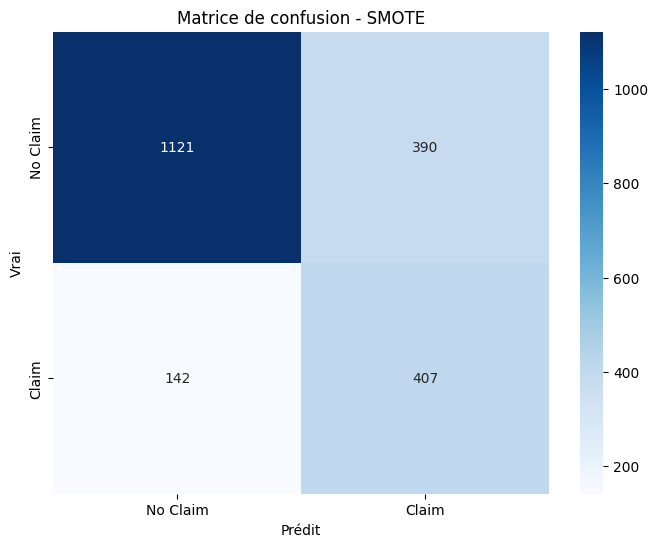


Méthode: Undersampling
Taille de l'échantillon d'entraînement: 4392
Distribution des classes (train): {0: 2196, 1: 2196}

Classification Report:
              precision    recall  f1-score   support

    No Claim       0.92      0.53      0.67      1511
       Claim       0.40      0.88      0.55       549

    accuracy                           0.62      2060
   macro avg       0.66      0.70      0.61      2060
weighted avg       0.78      0.62      0.64      2060

ROC AUC: 0.8081
PR AUC: 0.6172


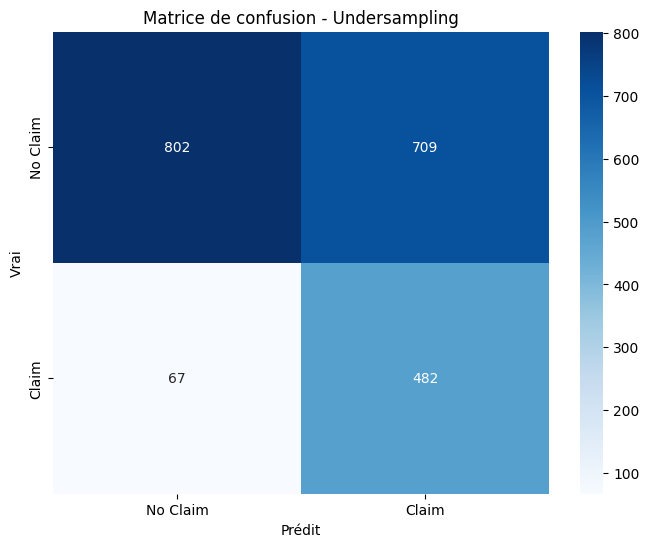


Méthode: SMOTE + Undersampling
Taille de l'échantillon d'entraînement: 9066
Distribution des classes (train): {0: 6044, 1: 3022}

Classification Report:
              precision    recall  f1-score   support

    No Claim       0.87      0.75      0.80      1511
       Claim       0.50      0.70      0.58       549

    accuracy                           0.73      2060
   macro avg       0.69      0.72      0.69      2060
weighted avg       0.77      0.73      0.75      2060

ROC AUC: 0.8153
PR AUC: 0.6231


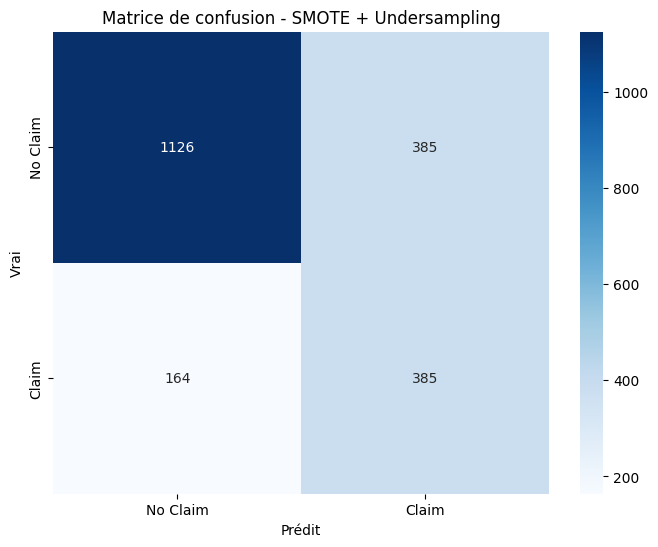


Optimisation du seuil de décision:
Meilleur seuil pour maximiser F1-score: 0.41

Classification Report avec seuil optimisé:
              precision    recall  f1-score   support

    No Claim       0.91      0.68      0.78      1511
       Claim       0.48      0.81      0.60       549

    accuracy                           0.72      2060
   macro avg       0.70      0.75      0.69      2060
weighted avg       0.79      0.72      0.73      2060



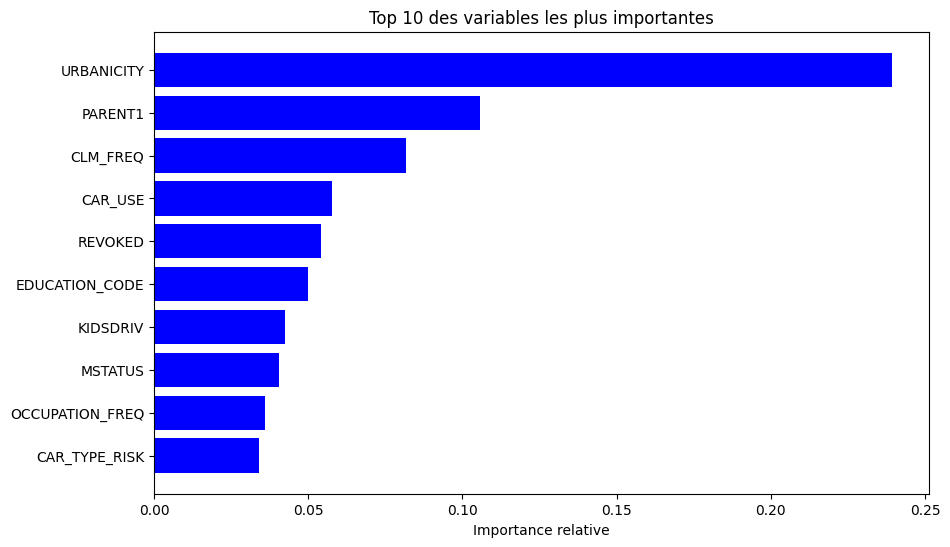

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight

file_path = "C:\\Users\\ayana\\OneDrive\\Bureau\\car insurance project\\car_insurance_clean_data.csv"
df = pd.read_csv(file_path)
df = df.drop(columns=['OLDCLAIM', 'CLM_AMT', 'CLAIM_RATIO', 'HOME_VAL_IMPUTED'])
num_cols = [col for col in df.columns if col not in ['CLAIM_FLAG'] and df[col].dtype in ['int64', 'float64']] 
cat_encoded_cols = [col for col in df.columns if col not in num_cols + ['CLAIM_FLAG'] and col.startswith(('OCCUPATION_', 'CAR_TYPE_'))]  
X = df[num_cols + cat_encoded_cols].values
y = df['CLAIM_FLAG']
print("Distribution des classes:")
print(y.value_counts())
print(f"\nRatio déséquilibre: {len(y[y==0])/len(y[y==1]):.1f}:1")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Gestion du déséquilibre - Différentes approches

# Approche 1: Class weights
weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights = {0: weights[0], 1: weights[1]}

# Approche 2: SMOTE (oversampling)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Approche 3: Undersampling
rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

# Approche 4: SMOTE + Undersampling (hybride)
smote_rus = Pipeline([
    ('smote', SMOTE(random_state=42, sampling_strategy=0.5)),  # Oversample la classe minoritaire
    ('rus', RandomUnderSampler(random_state=42, sampling_strategy=0.5))  # Undersample la classe majoritaire
])
X_train_hybrid, y_train_hybrid = smote_rus.fit_resample(X_train, y_train)

# Entraînement et évaluation des modèles

def train_and_evaluate(X_train, y_train, X_test, y_test, method_name):
    print(f"\n{'='*50}")
    print(f"Méthode: {method_name}")
    print(f"Taille de l'échantillon d'entraînement: {len(y_train)}")
    print(f"Distribution des classes (train): {pd.Series(y_train).value_counts().to_dict()}")
    
    # Initialisation du modèle XGBoost
    model = XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        min_child_weight=5,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,          # Régularisation L1
        reg_lambda=0.1,         # Régularisation L2
        scale_pos_weight=1 + (len(y[y==0]) / len(y[y==1])),  # Ajustement pour le déséquilibre
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    )
    
    # Entraînement
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0)
    
    # Prédictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Métriques
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['No Claim', 'Claim']))
    
    print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
    
    # Courbe Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)
    print(f"PR AUC: {pr_auc:.4f}")
    
    # Matrice de confusion
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), 
                annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Claim', 'Claim'],
                yticklabels=['No Claim', 'Claim'])
    plt.title(f'Matrice de confusion - {method_name}')
    plt.ylabel('Vrai')
    plt.xlabel('Prédit')
    plt.show()
    
    return model

# Entraînement avec les différentes méthodes
methods = {
    'Class Weights': (X_train, y_train),
    'SMOTE': (X_train_smote, y_train_smote),
    'Undersampling': (X_train_under, y_train_under),
    'SMOTE + Undersampling': (X_train_hybrid, y_train_hybrid)
}

for name, (X_tr, y_tr) in methods.items():
    train_and_evaluate(X_tr, y_tr, X_test, y_test, name)

# Optimisation du seuil de décision (exemple avec SMOTE + Undersampling)
print("\nOptimisation du seuil de décision:")
hybrid_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    min_child_weight=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    scale_pos_weight=1 + (len(y[y==0]) / len(y[y==1])),
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
hybrid_model.fit(X_train_hybrid, y_train_hybrid)
y_proba_hybrid = hybrid_model.predict_proba(X_test)[:, 1]

# Trouver le seuil optimal pour maximiser F1-score
thresholds = np.linspace(0.1, 0.9, 50)
f1_scores = []
for thresh in thresholds:
    y_pred_thresh = (y_proba_hybrid >= thresh).astype(int)
    report = classification_report(y_test, y_pred_thresh, output_dict=True)
    f1_scores.append(report['1']['f1-score'])

best_thresh = thresholds[np.argmax(f1_scores)]
print(f"Meilleur seuil pour maximiser F1-score: {best_thresh:.2f}")

# Évaluation avec le meilleur seuil
y_pred_optim = (y_proba_hybrid >= best_thresh).astype(int)
print("\nClassification Report avec seuil optimisé:")
print(classification_report(y_test, y_pred_optim, target_names=['No Claim', 'Claim']))

# Feature Importance (avec la méthode SMOTE + Undersampling)
feature_names = num_cols + cat_encoded_cols  # Utiliser les colonnes encodées existantes
importances = hybrid_model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(10, 6))
plt.title('Top 10 des variables les plus importantes')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importance relative')
plt.show()

Distribution des classes:
CLAIM_FLAG
0    7555
1    2745
Name: count, dtype: int64

Ratio déséquilibre: 2.8:1

Distribution avant rééquilibrage: {0: 6044, 1: 2196}
Distribution après rééquilibrage: {0: 3626, 1: 3626}

Scores Precision (validation croisée): [0.74141185 0.75477231 0.73954498 0.83814561 0.84685741]
Moyenne Precision: 0.7841 (+/- 0.0960)

Meilleur seuil (précision >= 0.70 ou F1 max): 0.81

Classification Report:
              precision    recall  f1-score   support

    No Claim       0.82      0.93      0.87      1511
       Claim       0.70      0.45      0.55       549

    accuracy                           0.80      2060
   macro avg       0.76      0.69      0.71      2060
weighted avg       0.79      0.80      0.79      2060

ROC AUC: 0.8290
PR AUC: 0.6509


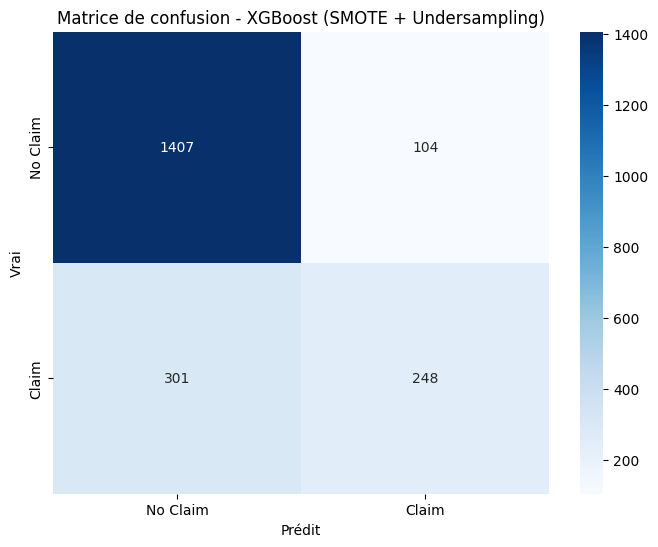

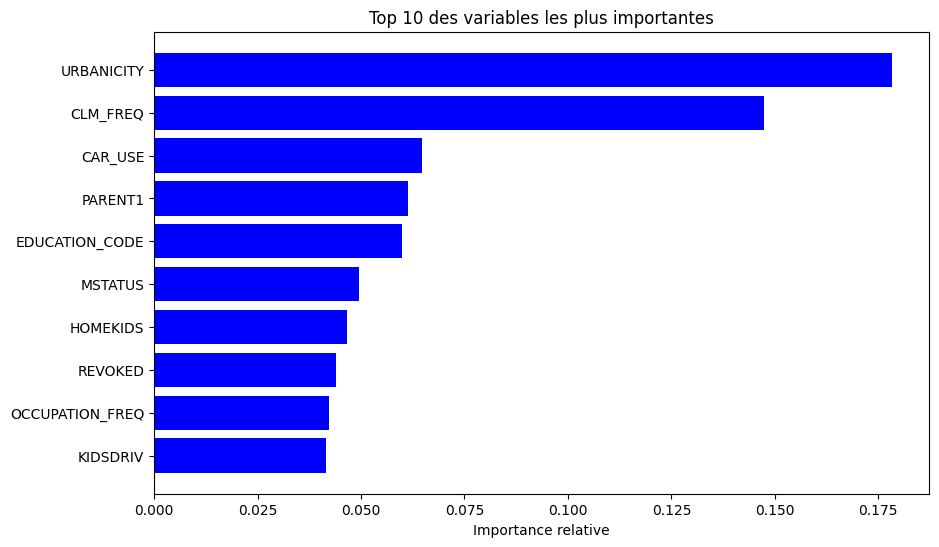

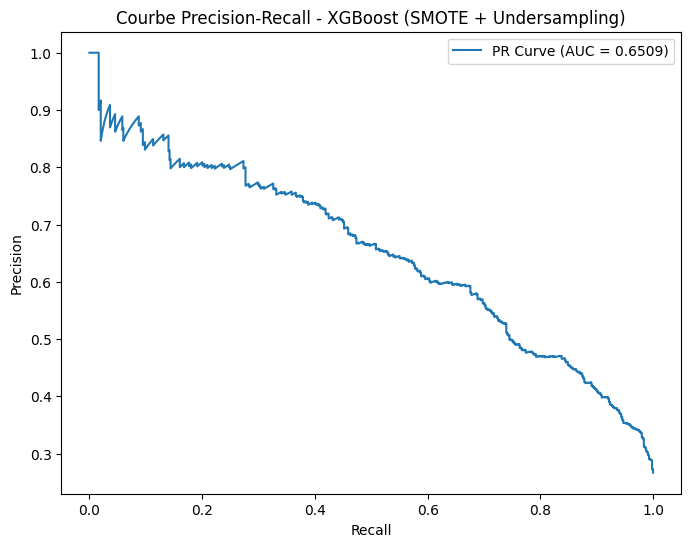

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight

file_path = "C:\\Users\\ayana\\OneDrive\\Bureau\\car insurance project\\car_insurance_clean_data.csv"
df = pd.read_csv(file_path)
df = df.drop(columns=['OLDCLAIM', 'CLM_AMT', 'CLAIM_RATIO', 'HOME_VAL_IMPUTED'])
num_cols = [col for col in df.columns if col not in ['CLAIM_FLAG'] and df[col].dtype in ['int64', 'float64']] 
cat_encoded_cols = [col for col in df.columns if col not in num_cols + ['CLAIM_FLAG'] and col.startswith(('OCCUPATION_', 'CAR_TYPE_'))]  
X = df[num_cols + cat_encoded_cols].values
y = df['CLAIM_FLAG']

print("Distribution des classes:")
print(y.value_counts())
print(f"\nRatio déséquilibre: {len(y[y==0])/len(y[y==1]):.1f}:1")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
smote_rus = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.6, random_state=42)),  
    ('rus', RandomUnderSampler(sampling_strategy=1.0, random_state=42))])
X_train_hybrid, y_train_hybrid = smote_rus.fit_resample(X_train, y_train)

print(f"\nDistribution avant rééquilibrage: {pd.Series(y_train).value_counts().to_dict()}")
print(f"Distribution après rééquilibrage: {pd.Series(y_train_hybrid).value_counts().to_dict()}")

# Définition du modèle XGBoost
model = XGBClassifier(
    n_estimators=400,           
    max_depth=4,                
    learning_rate=0.03,         
    min_child_weight=4,         
    subsample=0.7,              
    colsample_bytree=0.7,       
    reg_alpha=1.0,              
    reg_lambda=1.5,            
    scale_pos_weight=2.5,       
    random_state=42,
    eval_metric='logloss',
    n_jobs=-1
)

# Validation croisée
cv_scores = cross_val_score(model, X_train_hybrid, y_train_hybrid, cv=5, scoring='precision_weighted')
print(f"\nScores Precision (validation croisée): {cv_scores}")
print(f"Moyenne Precision: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Entraînement
model.fit(X_train_hybrid, y_train_hybrid, eval_set=[(X_test, y_test)], verbose=0)

#  Optimisation du seuil pour précision > 0.70
y_proba = model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
# Filtrer les seuils où la précision est > 0.70
valid_indices = np.where(precision >= 0.70)[0]
if len(valid_indices) > 0:
    best_index = valid_indices[np.argmax(f1_scores[valid_indices])]  # Maximiser F1 parmi les seuils valides
    best_threshold = thresholds[best_index]
else:
    best_index = np.argmax(f1_scores)  # Revenir au F1 max si aucune précision > 0.70
    best_threshold = thresholds[best_index]
print(f"\nMeilleur seuil (précision >= 0.70 ou F1 max): {best_threshold:.2f}")

# Évaluation avec seuil optimisé
y_pred = (y_proba >= best_threshold).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Claim', 'Claim']))

# Métriques supplémentaires
roc_auc = roc_auc_score(y_test, y_proba)
pr_auc = auc(recall, precision)
print(f"ROC AUC: {roc_auc:.4f}")
print(f"PR AUC: {pr_auc:.4f}")

# 10. Matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Claim', 'Claim'], yticklabels=['No Claim', 'Claim'])
plt.title('Matrice de confusion - XGBoost (SMOTE + Undersampling)')
plt.ylabel('Vrai')
plt.xlabel('Prédit')
plt.show()

# Importance des features
feature_names = num_cols + cat_encoded_cols
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10

plt.figure(figsize=(10, 6))
plt.title('Top 10 des variables les plus importantes')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importance relative')
plt.show()

# Courbe Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Courbe Precision-Recall - XGBoost (SMOTE + Undersampling)')
plt.legend()
plt.show()

In [13]:
import joblib
joblib.dump(model, 'xgboost_optimized_model.pkl')

['xgboost_optimized_model.pkl']